# Progetto visualizzazione scientifica dei dati
## La felicità nel mondo negli ultimi 10 anni
### Visualizzazione del mondo in cui viviamo utilizzando la felicità come lente tramite cui osservare.


Definizione strutture dati

In [22]:
anni= [2013,2015,2016,2017,2018,2019,2020,2021,2022,2023]
continenti= []
NULL= -0.013
class Data:
    def __init__(self, year, index, rank):
        self.year = int(year)
        if index!="NULL":
            self.index = float(index)
        else:
            self.index = NULL
        if rank!="NULL":
            self.rank = int(rank)
        else:
            self.rank = NULL

class Country:
    def __init__(self, country):
        self.country = country
        self.continent = ""
        self.data = []

    def add_datum(self, data_obj):
        self.data.append(data_obj)


Lettura del dataset WorldHappinessIndex2013-2023.csv

In [23]:
world = []
country_name=""
i=0
with open("WorldHappinessIndex2013-2023.csv", "r") as file:
    for line in file:
        line= line.strip()    # Strips the newline character at the end of each line
        line= line.split(',') 
        if len(line)!=4:
            raise Exception("Errore durante la lettura del file, la seguente linea non ha 4 elementi: "+' '.join(line))
        else:
            old_country_name= country_name
            country_name, year, index, rank = line
            if i==0:
                country_name= ''.join(char for char in country_name if char.isprintable()) #sanitizzazione
            if old_country_name==country_name:
                c.add_datum( Data(year,index,rank) )
            else:
                if i!=0:
                    world.append( c )
                c= Country(country_name)
                c.add_datum( Data(year,index,rank) )
                i=i+1

Completamento dei dati con aggiunta del contintente

In [24]:
import pycountry_convert as pc
import country_converter as coco

def ISO2_to_continent(country_alpha2):
    #country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

continenti= []
for country in world:
    try:
        country_iso2 =pc.country_name_to_country_alpha2(country.country)
    except:
        print(country.country,"non riconosciuto da  country_name_to_country_alpha2(), FIXING...")
        try:
            country_iso2 = coco.convert(names=[country.country], to='ISO2')
        except:
            print("...",country.country,"non riconosciuto da  coco.convert(, to='ISO2'), NOT FIXED.")
            country_iso2=""
    try:
        if country_iso2!="":
            country.continent= ISO2_to_continent(country_iso2)
            if country.continent not in continenti:
                continenti.append(country.continent)
        #else il country continent rimane "". Durante il lavoro c'è da controllare country.continent!="" come quando fai index!=NULL
    except:
        print(country_iso2,"non riconosciuto da ISO2_to_continent()")

print("Continenti dei paesi analizzati",continenti)


Congo Brazzaville non riconosciuto da  country_name_to_country_alpha2(), FIXING...
Congo Kinshasa non riconosciuto da  country_name_to_country_alpha2(), FIXING...
Kosovo non riconosciuto da  country_name_to_country_alpha2(), FIXING...
North Cyprus non riconosciuto da  country_name_to_country_alpha2(), FIXING...
Turkiye non riconosciuto da  country_name_to_country_alpha2(), FIXING...
Continenti dei paesi analizzati ['Asia', 'Europe', 'Africa', 'South America', 'Oceania', 'North America']


Gestione delle nulle ed eliminazione dei paesi con pochi dati (lascio solo a chi ha al più due null)

In [46]:
#controlli in più per sicurezza sul file di dati
paesiConDatiMancanti= []
datimancanti= 0
datitotali= 0
for country in world:
    if len(country.data)!=10: #controllo che ci siano i dati di tutti e 10 gli anni e che siano stati letti correttamente
        print("Missing or exceding data:",country.country, "has",len(country.data),"data items")
    for datum in country.data:
        if datum.index==NULL: #conto le nulle e salvo i paesi che le presentano
            paesiConDatiMancanti.append(country.country)
            datimancanti+= 1
        datitotali+=1
NomiPaesiDatiMancanti = list(dict.fromkeys(paesiConDatiMancanti)) #rimuovo doppioni dai paesi
print("Il numero di dati mancanti su dati totali è",datimancanti,"/",datitotali,"= ",round(datimancanti/datitotali*100,1),'%')
print("I paesi con dati parziali sono ",len(NomiPaesiDatiMancanti),"su",len(world),": ...")
#for nome in NomiPaesiDatiMancanti:
#    print(nome,paesiConDatiMancanti.count(nome))

datiscartati=0
paesiaccettati=0
wrld= [] #parte dagli stessi dati di world ma senza i 38 paesi con dati mancanti
for country in world: #mi copio i paesi con tutti i dati completi (possono avere al più 2 nulle)
    tmp= paesiConDatiMancanti.count(country.country)
    if tmp <= 2:
        paesiaccettati+= 1
        datiscartati+= tmp
        wrld.append(country)
datiaccettati= datitotali-datiscartati
print("I paesi accettati sono ",paesiaccettati,"su",len(world))
print("Il numero di dati accettati su dati totali è",datiaccettati,"/",datitotali,"= ",round(datiaccettati/datitotali*100,1),'%')

Il numero di dati mancanti su dati totali è 147 / 1660 =  8.9 %
I paesi con dati parziali sono  38 su 166 : ...
I paesi accettati sono  146 su 166
Il numero di dati accettati su dati totali è 1636 / 1660 =  98.6 %


In [26]:
#funzionalità di ricerca dati (dato nome paese e anno resituisce l'index of happiness)
'''
cercami=[("Switzerland",2015),("Iceland",2015),("Mauritius",2016),("Italy",2015)]
for v in cercami:
    for country in world:
        if country.country==v[0]:
            for d in country.data:
                if d.year==v[1]:
                    print(country.country,d.year,"\t\t=",d.index)''';

# Stampe dei grafici

In [27]:
import matplotlib.pyplot as plt
from matplotlib import style as style

### Scelgo le palett colori da usare e definisco i marcatori<br>
Creo la mia palet a partire da 2 set di colori per daltonici <br>
style.use('tableau-colorblind10') <br>
style.use('seaborn-colorblind')<br> 
#Articolo compatto ma completo sulla visualizzazione per i daltonici -> https://www.cta-observatory.org/wp-content/uploads/2020/10/CTA_ColourBlindness_BestPractices-1.pdf

['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
['#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9']
['#006BA4', '#FF800E', '#ABABAB', '#595959', '#009E73', '#CC79A7', '#F0E442', '#56B4E9', '#FFBC79', '#D55E00']


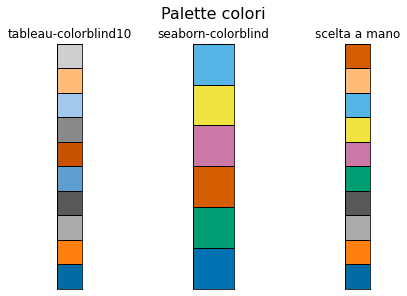

In [28]:
def drow_palette(color_cycle,ax):
    print(color_cycle)
    # Set the aspect ratio of the plot
    ax.set_aspect('equal')
    # Calculate the number of colors in the palette
    num_colors = len(color_cycle)
    # Set the y-limits of the plot based on the number of colors
    ax.set_ylim(0, num_colors)
    # Disable tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(axis='both', which='both', length=0)
    # Plot rectangles for each color
    for i, color in enumerate(color_cycle):
        ax.add_patch(plt.Rectangle((0, i), 1, 1, facecolor=color, edgecolor='black'))
    return ax

#colori usabili
fig, axs= plt.subplots(1,3)
with plt.style.context(("tableau-colorblind10",)):
    # Get the current color cycle
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    axs[0]= drow_palette(color_cycle,axs[0])
with plt.style.context(("seaborn-colorblind",)):
    # Get the current color cycle
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    axs[1]= drow_palette(color_cycle,axs[1])

colors = ['#006BA4', '#FF800E', '#ABABAB', '#595959','#009E73', '#CC79A7', '#F0E442', '#56B4E9', '#FFBC79','#D55E00']
axs[2]= drow_palette(colors,axs[2])

fig.suptitle('Palette colori', fontsize=16)
axs[0].set_title('tableau-colorblind10')
axs[1].set_title('seaborn-colorblind')
axs[2].set_title('scelta a mano')
plt.show()
markers= ["o","v","^","<",">","p","*","s","P","X"]

In [29]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

## Stampo la media mondiale della felicità per anno così da vedere come varia

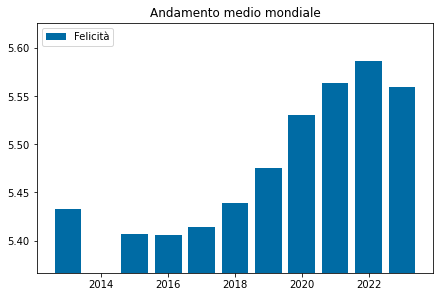

In [30]:
somma= [0 for _ in range(10)]
sommati= [0 for _ in range(10)]

for country in wrld:
    i=0
    for datum in country.data:
        if datum.year!=anni[i]: #controllo per sicurezza
            raise Exception("Errore di concordanza negli anni incontrati nel file:",datum.year,"!=",anni[i])
        if datum.index!=NULL:
            somma[i]+= datum.index
            sommati[i]+= 1
        i+=1

media= [s/n for s,n in zip(somma,sommati)]
e=(max(media)-min(media))*0.04 
plt.ylim(min(media)*(1-e), max(media)*(1+e))
plt.bar(anni,media,label="Felicità");
plt.title('Andamento medio mondiale')
plt.legend(loc="upper left")
plt.savefig('./Presentazione/img/1medieAnnue.pdf')  
plt.show()

## Confronto distribuzioni di felicità anno 2013-2022
ecco come: settato un certo $df$ conto per ogni bucket quanti paesi ne fanno parte e guardo che distribuzione ottengo, poi ripeto il procedimento per l'altra annata e confronto i due risultati

In [31]:
def happiness_distribution(wrld,year,df):
    x_start= 0
    x_end= 8
    intervalli= [i*df for i in range(int((x_end-x_start)/df)+1)]
    h= [0 for i in range(int((x_end-x_start)/df)+1)]
    #year= year
    contatore=0
    for c in wrld:
        for datum in c.data:
            if datum.year==year and datum.index!=NULL:
                contatore+=1
                h[int(datum.index/df)]+= 1
    print("contatore",year,"=",contatore)
    return intervalli, h

contatore 2022 = 142
contatore 2013 = 144


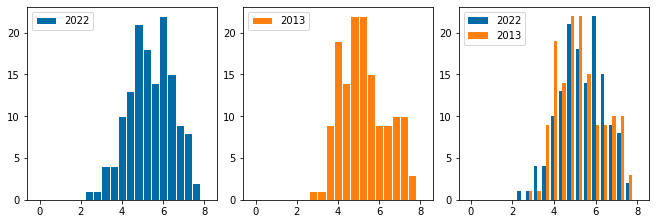

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9,3))
df=0.4

intervalli, h0= happiness_distribution(wrld,2022,df)
intervalli, h1= happiness_distribution(wrld,2013,df)
intervalli0=[i-df*0.8/4 for i in intervalli]
intervalli1=[i+df*0.8/4 for i in intervalli]

axs[0].bar(intervalli,h0,width=df,edgecolor='white',label="2022")
axs[1].bar(intervalli,h1,width=df,edgecolor='white',label="2013",color=colors[1])
axs[2].bar(intervalli0,h0,width=df*0.8/2,label="2022")
axs[2].bar(intervalli1,h1,width=df*0.8/2,label="2013")

axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left');

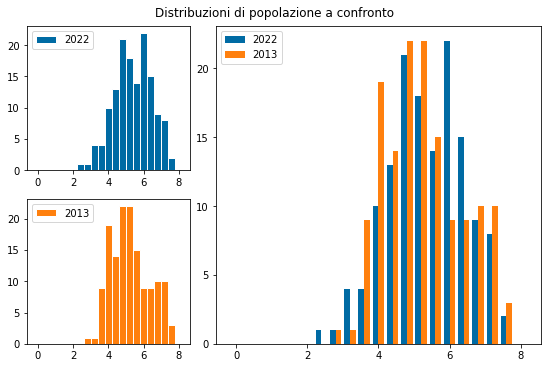

In [33]:
fig = plt.figure(figsize=(3*2.5, 2*2.5)) #
plt.rcParams['figure.constrained_layout.use'] = True
mosaic = """
    ACC
    BCC
    """
ax_dict = fig.subplot_mosaic(mosaic)


ax_dict["A"].bar(intervalli,h0,width=df,edgecolor='white',alpha=1,label="2022")
ax_dict["B"].bar(intervalli,h1,width=df,edgecolor='white',color=colors[1],label="2013")
intervalli0=[i-df*0.8/4 for i in intervalli]
intervalli1=[i+df*0.8/4 for i in intervalli]
ax_dict["C"].bar(intervalli0,h0,width=df*0.8/2,label="2022")
ax_dict["C"].bar(intervalli1,h1,width=df*0.8/2,label="2013")

for nome,ax in ax_dict.items():
    ax.legend(loc='upper left')
fig.suptitle('Distribuzioni di popolazione a confronto')
plt.show()
fig.savefig('./Presentazione/img/2DistribuzioniPopolazioni.pdf')  

## Comparazione a tre paesi (es: Italia, Francia, Germania)

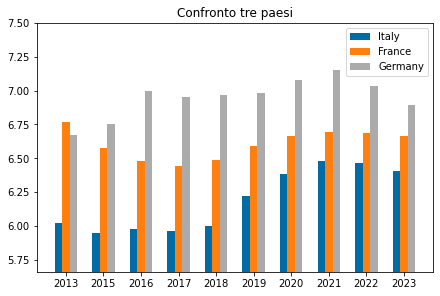

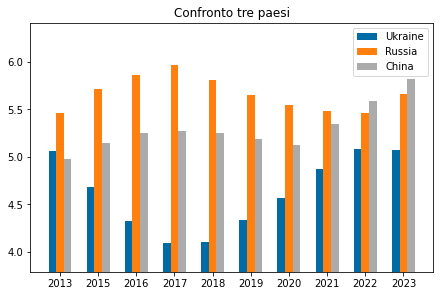

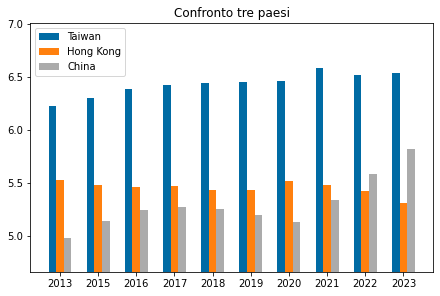

In [42]:
import numpy as np

def compare_by_years(paesi):
    dati= [[] for _ in range(len(paesi))]
    for i in range(len(paesi)):
        for country in wrld:
            if paesi[i]==country.country:
                for datum in country.data:
                    dati[i].append(datum.index)
                break

    fig, ax = plt.subplots() #figsize=(7,4)
    minimo=1000
    massimo=-1000
    dim= 1/(2+len(paesi))
    x= np.arange(len(anni))
    #print(paesi[0])
    ax.bar(x-dim,dati[0],width=dim,label=paesi[0])
    ax.bar(x    ,dati[1],width=dim,label=paesi[1])
    ax.bar(x+dim,dati[2],width=dim,label=paesi[2])
    ax.set_xticks(x)
    ax.set_xticklabels(anni)
    for data in dati:
        tmp= min(data)
        if tmp<minimo:
            minimo= tmp
        tmp=max(data)
        if tmp>massimo:
            massimo= tmp
    e=(massimo-minimo)*0.04 
    plt.ylim(minimo*(1-e), massimo*(1+e))
    ax.legend(loc='best') #loc='upper right'
    ax.set_title('Confronto tre paesi')
    plt.show()
    #print('./Presentazione/img/3ComparoPaesi_'+str('_'.join(paesi)).replace(" ", "")+'.pdf')
    fig.savefig('./Presentazione/img/3ComparoPaesi_'+'_'.join(paesi).replace(" ", "")+'.pdf')  

paesi= ["Italy","France","Germany"] #anni=[...]
compare_by_years(paesi)
paesi= ["Ukraine","Russia","China"] #anni=[...]
compare_by_years(paesi)
paesi= ["Taiwan","Hong Kong","China"] #anni=[...]
compare_by_years(paesi)


## Visualizzazione continentale di Nord e Sud America nel 2022
(Paesi ordinati per felicità)

In [36]:
def confronto_index(datum):
        return datum[1]
def continent_clasific(continente, anno, stampa):
    data= []
    for country in wrld:
        if country.continent==continente:
            for datum in country.data:
                if datum.year==anno and datum.index!=NULL and datum.rank!=NULL:
                    data.append( (str(datum.rank)+" "+country.country, datum.index) ) #[(nome,valore),(come,valore),...]
    # Ordinamento
    data = sorted(data, key=confronto_index)
    #estrazione dei dati ordinati per fare il grafico
    names=  [datum[0] for datum in data]
    values= [datum[1] for datum in data]
    #grafico
    if stampa==True:
        dim= 2+len(names)*0.25
        fig, ax = plt.subplots(figsize=(dim+1,dim))
        ax.barh(names,values,edgecolor='white',label="Felicità")
        massimo= values[-1]
        minimo= values[0]
        e=(massimo-minimo)*0.04 
        plt.xlim(minimo*(1-e), massimo*(1+e/4))
        ax.legend(loc='lower right') #loc='upper right'
        ax.set_title('Panoramica '+continente+" "+str(anno))
        plt.show()
        fig.savefig('./Presentazione/img/4Classifica_'+continente+"_"+str(anno)+'.pdf')

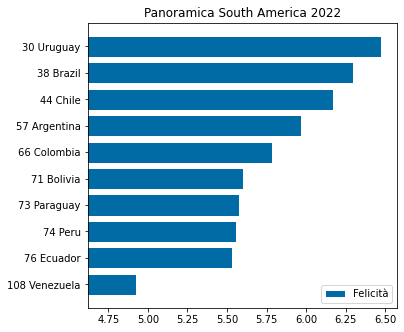

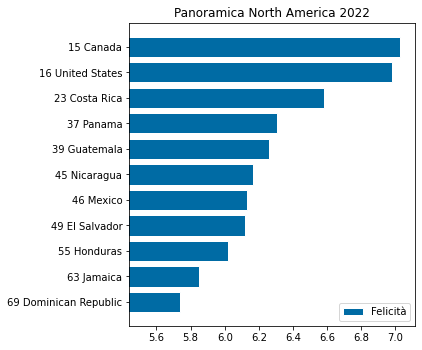

In [37]:
stampa= ["North America", "South America"]
anno= 2022

for continente in continenti:
    continent_clasific(continente,anno,continente in stampa)

## Stampo i trend continentali per confrontare le crescite

In [38]:
def media_continentale(continente):
    sum= [0 for _ in range(len(anni))]
    cont=[0 for _ in range(len(anni))]
    
    for country in wrld:
        if country.continent==continente:
            for i in range(len(country.data)):
                datum= country.data[i].index
                if datum!=NULL:
                    sum[i]+= datum
                    cont[i]+= 1
    average= [s/c for s,c in zip(sum,cont)]
    
    return average

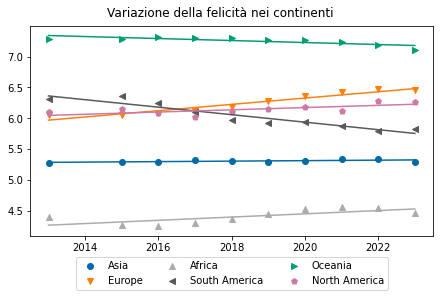

In [39]:
from scipy import stats

fig,ax= plt.subplots()#figsize=(7,5)
i=0
for continente in continenti:
    media=  media_continentale(continente)
    ax.scatter(anni,media,label=continente,marker=markers[i])
    slope, intercept, r, p, std_err = stats.linregress(anni, media)
    y=[x*slope+intercept for x in anni]
    ax.plot(anni,y)
    i+= 1
ax.legend(ncol=3,loc='lower center',bbox_to_anchor=(0.5, -0.28))
fig.suptitle("Variazione della felicità nei continenti")
plt.show()
fig.savefig('./Presentazione/img/5AndamentiContinentali.pdf')

## Stampo i 6 paesi più/meno cresciuti dal 2013

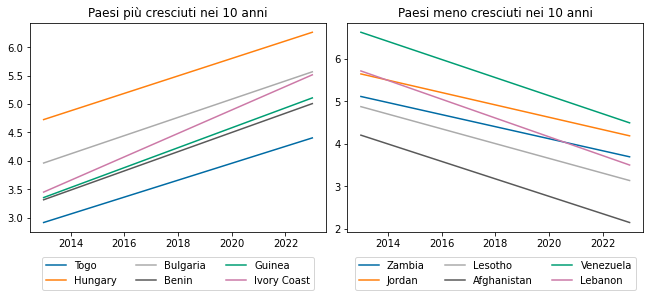

In [40]:
from math import ceil
def inserire_migliori(tupla,paesi):
    if len(paesi)<n: 
        paesi.append(tupla)
        paesi.sort(key=lambda tup: tup[1])  # sorts in place
    else:
        if tupla[1]>paesi[0][1]: #va inserito
            paesi.append(tupla)
            paesi.sort(key=lambda tup: tup[1])  # sorts in place
            paesi.pop(0) #elimino il meno grande (cioè il primo visto che è in ordine crescente)
def inserire_peggiori(tupla,paesi):
    if len(paesi)<n: 
        paesi.append(tupla)
        paesi.sort(key=lambda tup: tup[1],reverse=True)  # sorts in place
    else:
        if tupla[1]<paesi[0][1]: #va inserito
            paesi.append(tupla)
            paesi.sort(key=lambda tup: tup[1],reverse=True)  # sorts in place
            paesi.pop(0) #elimino il meno grande (cioè il primo visto che è in ordine crescente)


n= 6
paesi_up= [] # (nome,m,q) con y=mx+q
paesi_dw= []
for country in wrld:
    indexes= [datum.index for datum in country.data if datum.index!=NULL]
    years= [datum.year for datum in country.data if datum.index!=NULL]
    slope, intercept, r, p, std_err = stats.linregress(years, indexes)
    inserire_migliori( (country.country,slope,intercept), paesi_up )
    inserire_peggiori( (country.country,slope,intercept), paesi_dw )
    

#stampo:
fig,axes= plt.subplots(1,2,figsize=(4.5*2,4))
for paese in paesi_up:
    y=[x*paese[1]+paese[2] for x in anni]
    axes[0].plot(anni,y,label=paese[0])
for paese in paesi_dw:
    y=[x*paese[1]+paese[2] for x in anni]
    axes[1].plot(anni,y,label=paese[0])
axes[0].legend(ncol=ceil(n/2),loc='lower center',bbox_to_anchor=(0.5, -0.3))
axes[1].legend(ncol=ceil(n/2),loc='lower center',bbox_to_anchor=(0.5, -0.3))
axes[0].set_title("Paesi più cresciuti nei 10 anni")
axes[1].set_title("Paesi meno cresciuti nei 10 anni")
plt.show()
fig.savefig('./Presentazione/img/6MaggioreVariazione.pdf')

## Chi è scresciuto di più  tra chi stava peggio e chi stava meglio nel 2013
Presi gli n=10 peggiori e migliori OPPURE divisi i paesi in k=6 gruppi vediamo chi è cresciuto di più, chi sta bene tende a stare sempre meglio e chi sta male sempre peggio?

20


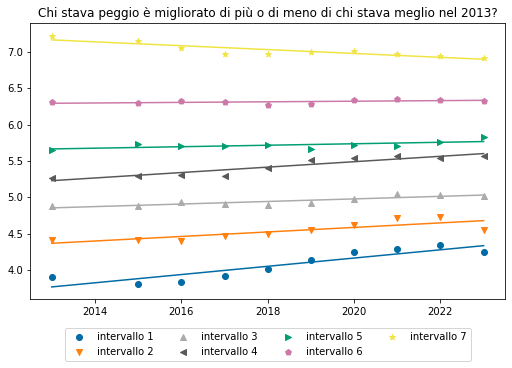

In [43]:
def mediare(w):
    sum= [0 for _ in range(len(anni))]
    cont=[0 for _ in range(len(anni))]
    
    for country in w:
        for i in range(len(country.data)):
            datum= country.data[i].index
            if datum!=NULL:
                sum[i]+= datum
                cont[i]+= 1
    average= [s/c for s,c in zip(sum,cont)]
    
    return average


k=7
wrld11= [c for c in wrld if c.data[0].index!=NULL]#seleziono solo i paesi che nella data più vecchia (2013) avevano un dato valido
wrld11.sort(key=lambda c: c.data[0].index) #la posizione data[0] sono i dati più vecchi
#onguno di ognuno di questi k gruppi faccio la media sugli anni
dim= len(wrld11)//k
print(dim)
fig,ax= plt.subplots(figsize=(7,5))
for i in range(1,k+1):
    if i==k:
        medieAnnue= mediare(wrld11[(i-1)*dim:-1])
    else:
        medieAnnue= mediare(wrld11[(i-1)*dim:i*dim])
    slope, intercept, r, p, std_err = stats.linregress(years, medieAnnue)
    ax.scatter(anni,medieAnnue,label="intervallo "+str(i),marker=markers[(i-1)%len(markers)])
    y=[x*slope+intercept for x in anni]
    ax.plot(anni,y)
ax.legend(ncol=4,loc='lower center',bbox_to_anchor=(0.5, -0.24))
ax.set_title("Chi stava peggio è migliorato di più o di meno di chi stava meglio nel 2013?")
plt.show()
fig.savefig('./Presentazione/img/7ImmobilismoOVariazioneBenessere.pdf')